### Library

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

### Read File

In [120]:
df = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1.csv")
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


## Check the Summary of The Dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


#### Top 5 Years with Highest Total Production

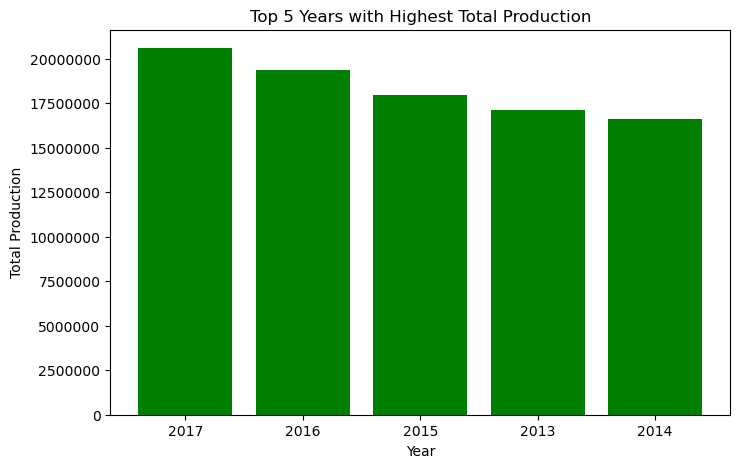

In [122]:
top5_years_highest = (
    df.groupby("Tahun", as_index=False)["Produksi"]
      .sum()
      .sort_values("Produksi", ascending=False)
      .head(5)
)


plt.figure(figsize=(8, 5))
plt.bar(top5_years_highest["Tahun"].astype(str), top5_years_highest["Produksi"], color='green')
plt.title("Top 5 Years with Highest Total Production")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Top 5 Years with Lowest Total Production

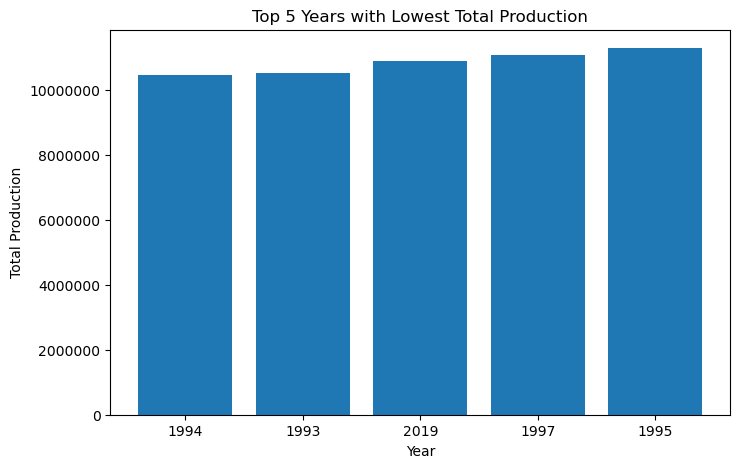

In [123]:
top5_years_lowest = (
    df.groupby("Tahun", as_index=False)["Produksi"]
      .sum()
      .sort_values("Produksi", ascending=True)
      .head(5)
)


plt.figure(figsize=(8, 5))
plt.bar(top5_years_lowest["Tahun"].astype(str), top5_years_lowest["Produksi"])
plt.title("Top 5 Years with Lowest Total Production")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### National Production Trend by Year

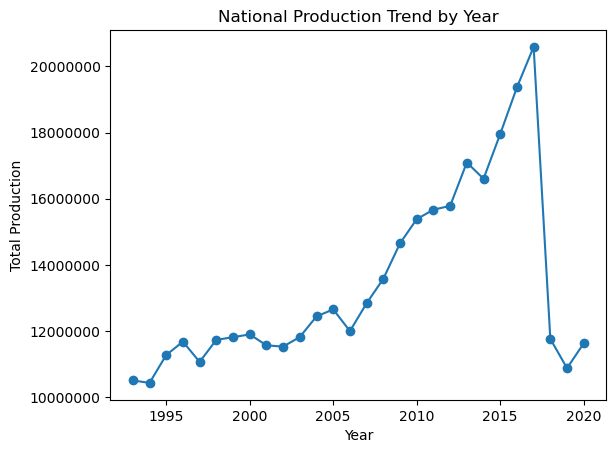

In [124]:
prod_trend = df.groupby("Tahun", as_index=False)["Produksi"].sum()

plt.plot(prod_trend["Tahun"], prod_trend["Produksi"], marker='o')
plt.title("National Production Trend by Year")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Distribution of Production

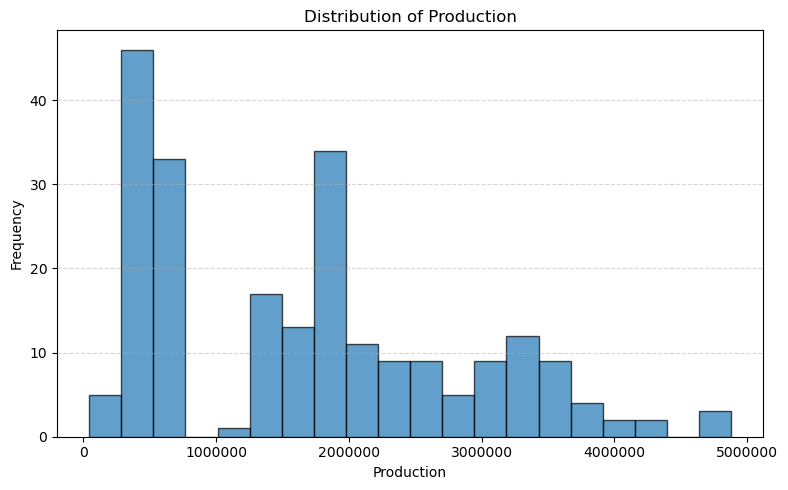

In [125]:
plt.figure(figsize=(8, 5))
plt.hist(df["Produksi"], bins=20, alpha=0.7, edgecolor="black")

plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Production", fontsize=12)
plt.xlabel("Production", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Outlier Check

In [126]:
Numerical = ["Tahun", "Luas Panen", "Curah hujan", "Kelembapan", "Suhu rata-rata"]

<Axes: >

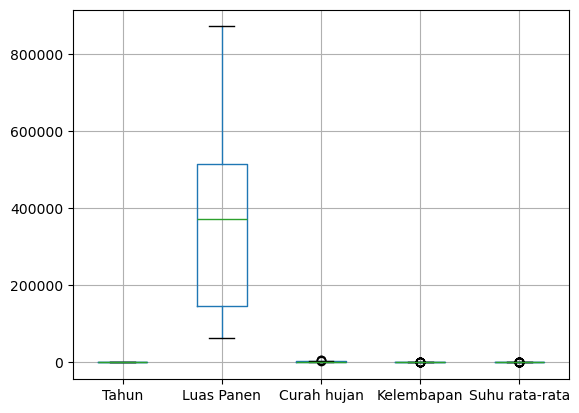

In [127]:
df.boxplot(Numerical)

Split Data

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [129]:
x = df.drop("Produksi", axis= 1)
y = df["Produksi"]

x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [130]:
print("x_train size", x_train.shape[0])
print("x_test size", x_test.shape[0])
print("y_train size", y_train.shape[0])
print("y_test size", y_test.shape[0])

x_train size 179
x_test size 45
y_train size 179
y_test size 45


In [131]:
preprocessing = ColumnTransformer(
    transformers=[
    ("Categorical", OneHotEncoder(handle_unknown= "ignore"), ["Provinsi"]),
    ("Pass", "passthrough", Numerical)
])

In [132]:
model_log = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log1p,
    inverse_func=np.expm1
)

In [133]:
pipeline = Pipeline(steps= [
("preprocess", preprocessing),
("model", model_log)
])

### Baseline Linear Regression

In [134]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('Categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Provinsi']),
                                                 ('Pass', 'passthrough',
                                                  ['Tahun', 'Luas Panen',
                                                   'Curah hujan', 'Kelembapan',
                                                   'Suhu rata-rata'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [135]:
y_pred_baseline = pipeline.predict(x_test)

r2_base = r2_score(y_test, y_pred_baseline)
mse_base = mean_squared_error(y_test, y_pred_baseline)
mae_base = mean_absolute_error(y_test, y_pred_baseline)
mape_base = mean_absolute_percentage_error(y_test, y_pred_baseline)

#### Outlier Investigation: Identifying Noise versus Real Patterns

In [143]:
results = x_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred_baseline
results["Residual"] = results["Actual"] - results["Predicted"]
results["Abs_Residual"] = results["Residual"].abs()

# Threshold = 95th percentile
threshold = results["Abs_Residual"].quantile(0.95)

# Flag outliers (do NOT drop yet)
results["OutlierFlag"] = results["Abs_Residual"] > threshold

results.head()


,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Actual,Predicted,Residual,Abs_Residual,OutlierFlag
9,Aceh,2002,315131.00,1296.8,68.75,29.20,1314165.00,1.416684e+06,-102518.907081,102518.907081,False
84,Riau,1993,146133.00,2738.4,86.37,26.00,436297.00,3.705932e+05,65703.779725,65703.779725,False
117,Jambi,1998,178766.00,2383.8,83.47,26.78,550277.00,4.852361e+05,65040.944008,65040.944008,False
144,Sumatera Selatan,1997,469670.00,1558.3,78.47,26.75,1577398.00,1.774089e+06,-196691.300488,196691.300488,False
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91,2.645084e+06,-156442.254852,156442.254852,False


In [144]:
clean_data = results[results["OutlierFlag"] == False]

X_clean = clean_data[x_train.columns]
y_clean = clean_data["Actual"]

pipeline_clean = Pipeline(steps=[
    ("preprocess", preprocessing),
    ("model", model_log)
])

pipeline_clean.fit(X_clean, y_clean)

y_pred_clean = pipeline_clean.predict(x_test)

r2_clean = r2_score(y_test, y_pred_clean)
mse_clean = mean_squared_error(y_test, y_pred_clean)
mae_clean = mean_absolute_error(y_test, y_pred_clean)
mape_clean = mean_absolute_percentage_error(y_test, y_pred_clean)
    

In [145]:
print("Baseline (with outliers)")
print("R2:", r2_base)
print("MSE:", mse_base)
print("MAE:", mae_base)
print("MAPE:", mape_base)

print("\nWithout outliers")
print("R2:", r2_clean)
print("MSE:", mse_clean)
print("MAE:", mae_clean)
print("MAPE:", mape_clean)


Baseline (with outliers)
R2: 0.9480819763292534
MSE: 45902203280.19664
MAE: 152515.01903438903
MAPE: 0.2943296124574487

Without outliers
R2: 0.7119343935586531
MSE: 254687006361.42093
MAE: 292069.41157004435
MAPE: 0.23206884313896764


##### The results show that removing outliers decreases model performance significantly. This indicates that extreme observations are not noise but represent meaningful variations in agricultural production, possibly related to unusual climate conditions. Therefore, outliers were retained in the dataset.

### Hyper Tuning Linear Regression

In [155]:
param_grid = {
    "model__regressor__fit_intercept": [True, False], 
    "model__regressor__positive": [False, True],
    "model__regressor__copy_X": [True, False],         
    "model__regressor__n_jobs": [None]                 
}

In [156]:
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('Categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Provinsi']),
                                                                        ('Pass',
                                                                         'passthrough',
                                                                         ['Tahun',
                                                                          'Luas '
                                                                          'Panen',
                                                                          'Curah '
                                                                          'hujan',
                                                                          'Kelembapan',
                                                                          'Suhu '
                                                                          'rata-rata'])])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=LinearRegression()))]),
             n_jobs=-1,
             param_grid={'model__regressor__copy_X': [True, False],
                         'model__regressor__fit_intercept': [True, False],
                         'model__regressor__n_jobs': [None],
                         'model__regressor__positive': [False, True]},
             scoring='r2')

In [157]:
grid.best_params_

{'model__regressor__copy_X': True,
 'model__regressor__fit_intercept': True,
 'model__regressor__n_jobs': None,
 'model__regressor__positive': True}

In [158]:
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(x_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)

print("R2:", r2_tuned)
print("MSE:", mse_tuned)
print("MAE:", mae_tuned)
print("MAPE:", mape_tuned)

R2: 0.9476874974673296
MSE: 46250973276.231155
MAE: 152955.23512870213
MAPE: 0.2949188682884279


### Comparing Between Baseline and Tuned Model

In [159]:
print("Baseline")
print("R2:", r2_base)
print("MSE:", mse_base)
print("MAE:", mae_base)
print("MAPE:", mape_base)

print("\nTuned")
print("R2:", r2_tuned)
print("MSE:", mse_tuned)
print("MAE:", mae_tuned)
print("MAPE:", mape_tuned)

Baseline
R2: 0.9480819763292534
MSE: 45902203280.19664
MAE: 152515.01903438903
MAPE: 0.2943296124574487

Tuned
R2: 0.9476874974673296
MSE: 46250973276.231155
MAE: 152955.23512870213
MAPE: 0.2949188682884279


###### Even though the baseline model (positive = False) performs slightly better on the test set, GridSearch selects positive = True because it gives a higher average score in cross-validation on the training data.

###### GridSearch chooses the model based on cross-validation results, not based on test set performance.
###### So, the tuned model is the one that works best on average during training, even if it is slightly worse on the test set.

### Evaluating Model Stability and Overfitting Using Learning Curves

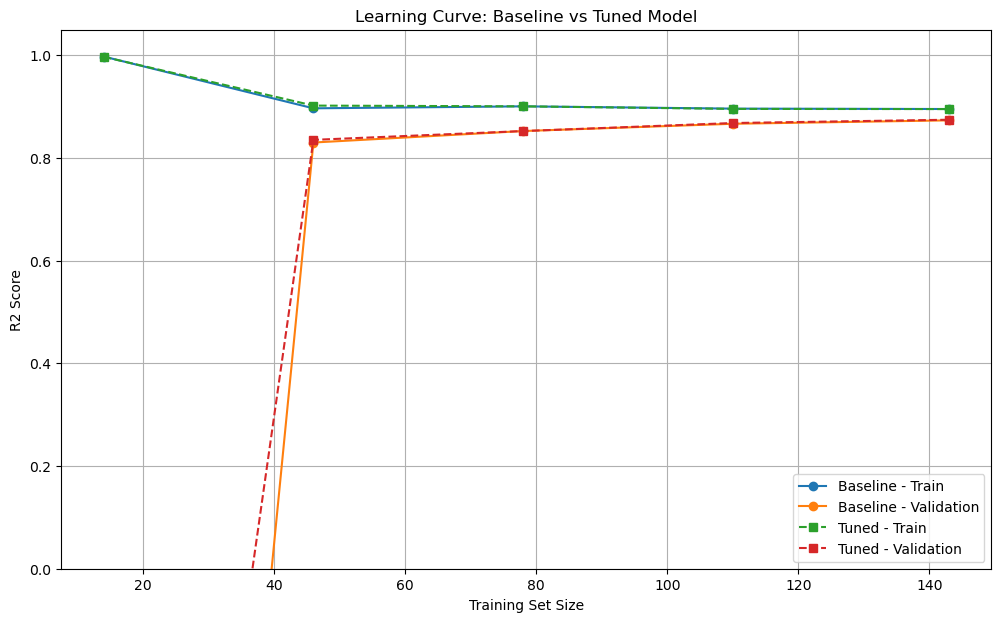

In [169]:
# Baseline model
baseline_model = pipeline

# Tuned model
tuned_model = best_model

train_sizes = np.linspace(0.1, 1.0, 5)

# Baseline learning curve
train_sizes_b, train_scores_b, val_scores_b = learning_curve(
    baseline_model, x_train, y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Tuned learning curve
train_sizes_t, train_scores_t, val_scores_t = learning_curve(
    tuned_model, x_train, y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

train_mean_b = train_scores_b.mean(axis=1)
val_mean_b = val_scores_b.mean(axis=1)

train_mean_t = train_scores_t.mean(axis=1)
val_mean_t = val_scores_t.mean(axis=1)

plt.figure(figsize=(12, 7))

plt.plot(train_sizes_b, train_mean_b, marker="o", label="Baseline - Train")
plt.plot(train_sizes_b, val_mean_b, marker="o", label="Baseline - Validation")

plt.plot(train_sizes_t, train_mean_t, marker="s", linestyle="--", label="Tuned - Train")
plt.plot(train_sizes_t, val_mean_t, marker="s", linestyle="--", label="Tuned - Validation")

plt.ylim(0, 1.05) 

plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.title("Learning Curve: Baseline vs Tuned Model")
plt.legend()
plt.grid(True)
plt.show()

In [166]:
train_score_tuned = best_model.score(x_train, y_train)
test_score_tuned = best_model.score(x_test, y_test)
train_score_base = pipeline.score(x_train, y_train)
test_score_base = pipeline.score(x_test, y_test)

df_bukti = pd.DataFrame({
    'Model': ['Baseline', 'Tuned'],
    'Train R2 Score': [train_score_base, train_score_tuned],
    'Test R2 Score': [test_score_base, test_score_tuned],
    'Gap': [train_score_base - test_score_base, train_score_tuned - test_score_tuned]
})

print(df_bukti)

      Model  Train R2 Score  Test R2 Score       Gap
0  Baseline        0.107314       0.711934 -0.604620
1     Tuned        0.893760       0.947687 -0.053928


The Tuned Model shows excellent performance and is not overfitting because the training and validation lines on the graph converge toward the same high $R^2$ score, with only a tiny 5% gap between them. The Baseline - Train line is not visible in the top area of the plot because its score is extremely low at 0.10, placing it far below the high-performing Tuned model lines that stay near 0.90. Ultimately, your tuning process successfully moved the model from underfitting to a well-fitted state that generalizes perfectly to new data.

### Save Model

In [170]:
import joblib

joblib.dump(pipeline, 'production_padi_model(linear_reg).pkl')

print("Model berhasil disimpan dengan nama: production_padi_model(linear_reg).pkl")

Model berhasil disimpan dengan nama: production_padi_model(linear_reg).pkl
